In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# SELLER P&L ANALYSIS

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [2]:
from olist.seller import Seller
Seller().get_training_data()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP,0.000000,13.018588,2017-05-05 16:25:11,2017-08-30 12:50:19,4.0,3,3,1.000000,218.70,0.333333,0.333333,3.00
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP,0.000000,9.065716,2017-03-29 02:10:34,2018-06-06 20:15:21,14.0,40,41,1.025000,11703.07,0.050000,0.725000,4.55
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ,0.000000,4.042292,2018-07-30 12:44:49,2018-07-30 12:44:49,0.0,1,1,1.000000,158.00,0.000000,1.000000,5.00
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP,0.000000,5.667187,2018-08-03 00:44:08,2018-08-03 00:44:08,0.0,1,1,1.000000,79.99,0.000000,1.000000,5.00
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP,3.353727,35.314861,2017-11-14 12:15:25,2017-11-14 12:15:25,0.0,1,1,1.000000,167.99,1.000000,0.000000,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2962,98dddbc4601dd4443ca174359b237166,sarandi,PR,0.000000,8.230822,2018-07-14 03:10:19,2018-07-23 15:34:03,0.0,2,2,1.000000,158.00,0.000000,1.000000,5.00
2963,f8201cab383e484733266d1906e2fdfa,palhoca,SC,0.000000,13.045797,2017-06-17 15:30:11,2018-08-11 19:55:17,14.0,10,10,1.000000,889.00,0.100000,0.500000,4.10
2964,74871d19219c7d518d0090283e03c137,sao paulo,SP,0.000000,3.606625,2018-04-05 17:09:46,2018-08-21 19:25:15,5.0,6,7,1.166667,550.04,0.000000,1.000000,5.00
2965,e603cf3fec55f8697c9059638d6c8eb5,pelotas,RS,0.000000,6.657634,2017-02-09 02:43:17,2017-06-16 17:30:16,4.0,8,11,1.375000,297.00,0.000000,0.500000,4.25


In [4]:
from olist.seller_updated import Seller as SellerUpdated
df = SellerUpdated().get_review_score()
df.head()

,order_id,seller_id,dim_is_five_star,dim_is_one_star,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,0,5
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,0,0,4
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,1,0,5
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,0,0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,1,0,5


In [11]:
df['cost_of_review'] = df.review_score.map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})
df.head()

,order_id,seller_id,dim_is_five_star,dim_is_one_star,review_score,cost_of_review
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,1,0,5,0
1,00018f77f2f0320c557190d7a144bdd3,dd7ddc04e1b6c2c614352b383efe2d36,0,0,4,0
2,000229ec398224ef6ca0657da4fc703e,5b51032eddd242adc84c38acab88f23d,1,0,5,0
3,00024acbcdf0a6daa1e931b038114c75,9d7a1d34a5052409006425275ba1c2b4,0,0,4,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,df560393f3a51e74553ab94004ba5c87,1,0,5,0


In [14]:
df.groupby('seller_id').cost_of_review.sum()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532     100
001cca7ae9ae17fb1caed9dfb1094831    3560
001e6ad469a905060d959994f1b41e4f     100
002100f778ceb8431b7a1020ff7ab48f    1110
003554e2dce176b5555353e4f3555ac8       0
                                    ... 
ffcfefa19b08742c5d315f2791395ee5     100
ffdd9f82b9a447f6f8d4b91554cc7dd3     190
ffeee66ac5d5a62fe688b9d26f83f534     200
fffd5413c0700ac820c7069d66d98c89    1360
ffff564a4f9085cd26170f4732393726    1420
Name: cost_of_review, Length: 3090, dtype: int64

❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

In [ ]:
# Your pseudo-code

❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

```python
import pandas as pd
import numpy as np
from olist.data import Olist
from olist.order import Order


class Seller:
    def __init__(self):
        # Import data only once
        olist = Olist()
        self.data = olist.get_data()
        self.order = Order()

    def get_seller_features(self):
        """
        Returns a DataFrame with:
        'seller_id', 'seller_city', 'seller_state'
        """
        sellers = self.data[
            "sellers"
        ].copy()  # Make a copy before using inplace=True so as to avoid modifying self.data
        sellers.drop("seller_zip_code_prefix", axis=1, inplace=True)
        sellers.drop_duplicates(inplace=True)  # There can be multiple rows per seller
        return sellers

    def get_seller_delay_wait_time(self):
        """
        Returns a DataFrame with:
        'seller_id', 'delay_to_carrier', 'wait_time'
        """
        # Get data
        order_items = self.data["order_items"].copy()
        orders = self.data["orders"].query("order_status=='delivered'").copy()

        ship = order_items.merge(orders, on="order_id")

        # Handle datetime
        ship.loc[:, "shipping_limit_date"] = pd.to_datetime(ship["shipping_limit_date"])
        ship.loc[:, "order_delivered_carrier_date"] = pd.to_datetime(
            ship["order_delivered_carrier_date"]
        )
        ship.loc[:, "order_delivered_customer_date"] = pd.to_datetime(
            ship["order_delivered_customer_date"]
        )
        ship.loc[:, "order_purchase_timestamp"] = pd.to_datetime(
            ship["order_purchase_timestamp"]
        )

        # Compute delay and wait_time
        def delay_to_logistic_partner(d):
            days = np.mean(
                (d.order_delivered_carrier_date - d.shipping_limit_date)
                / np.timedelta64(24, "h")
            )
            if days > 0:
                return days
            else:
                return 0

        def order_wait_time(d):
            days = np.mean(
                (d.order_delivered_customer_date - d.order_purchase_timestamp)
                / np.timedelta64(24, "h")
            )
            return days

        delay = ship.groupby("seller_id").apply(delay_to_logistic_partner).reset_index()
        delay.columns = ["seller_id", "delay_to_carrier"]

        wait = ship.groupby("seller_id").apply(order_wait_time).reset_index()
        wait.columns = ["seller_id", "wait_time"]

        df = delay.merge(wait, on="seller_id")

        return df

    def get_active_dates(self):
        """
        Returns a DataFrame with:
        'seller_id', 'date_first_sale', 'date_last_sale', 'months_on_olist'
        """
        # First, get only orders that are approved
        orders_approved = self.data["orders"][
            ["order_id", "order_approved_at"]
        ].dropna()

        # Then, create a (orders <> sellers) join table because a seller can appear multiple times in the same order
        orders_sellers = orders_approved.merge(self.data["order_items"], on="order_id")[
            ["order_id", "seller_id", "order_approved_at"]
        ].drop_duplicates()
        orders_sellers["order_approved_at"] = pd.to_datetime(
            orders_sellers["order_approved_at"]
        )

        # Compute dates
        orders_sellers["date_first_sale"] = orders_sellers["order_approved_at"]
        orders_sellers["date_last_sale"] = orders_sellers["order_approved_at"]
        df = orders_sellers.groupby("seller_id").agg(
            {"date_first_sale": min, "date_last_sale": max}
        )
        df["months_on_olist"] = round(
            (df["date_last_sale"] - df["date_first_sale"]) / np.timedelta64(1, "M")
        )
        return df

    def get_quantity(self):
        """
        Returns a DataFrame with:
        'seller_id', 'n_orders', 'quantity', 'quantity_per_order'
        """
        order_items = self.data["order_items"]

        n_orders = order_items.groupby("seller_id")["order_id"].nunique().reset_index()
        n_orders.columns = ["seller_id", "n_orders"]

        quantity = order_items.groupby("seller_id", as_index=False).agg(
            {"order_id": "count"}
        )
        quantity.columns = ["seller_id", "quantity"]

        result = n_orders.merge(quantity, on="seller_id")
        result["quantity_per_order"] = result["quantity"] / result["n_orders"]
        return result

    def get_sales(self):
        """
        Returns a DataFrame with:
        'seller_id', 'sales'
        """
        return (
            self.data["order_items"][["seller_id", "price"]]
            .groupby("seller_id")
            .sum()
            .rename(columns={"price": "sales"})
        )

    def get_review_score(self):
        """
        Returns a DataFrame with:
        'seller_id', 'share_of_five_stars', 'share_of_one_stars', 'review_score', 'cost_of_reviews'
        """

        orders_reviews = self.order.get_review_score()
        orders_sellers = self.data["order_items"][
            ["order_id", "seller_id"]
        ].drop_duplicates()

        df = orders_sellers.merge(orders_reviews, on="order_id")
        df["cost_of_review"] = df.review_score.map({1: 100, 2: 50, 3: 40, 4: 0, 5: 0})

        res = df.groupby("seller_id", as_index=False).agg(
            {
                "dim_is_one_star": "mean",
                "dim_is_five_star": "mean",
                "review_score": "mean",
                "cost_of_review": "sum",
            }
        )
        # Rename columns
        res.columns = [
            "seller_id",
            "share_of_one_stars",
            "share_of_five_stars",
            "review_score",
            "cost_of_reviews",
        ]

        return res

    def get_training_data(self):
        """
        Returns a DataFrame with:
        ['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier',
        'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist', 'share_of_one_stars',
        'share_of_five_stars', 'review_score', 'cost_of_reviews', 'n_orders', 'quantity',
        'quantity_per_order', 'sales']
        """

        training_set = (
            self.get_seller_features()
            .merge(self.get_seller_delay_wait_time(), on="seller_id")
            .merge(self.get_active_dates(), on="seller_id")
            .merge(self.get_quantity(), on="seller_id")
            .merge(self.get_sales(), on="seller_id")
        )

        if self.get_review_score() is not None:
            training_set = training_set.merge(self.get_review_score(), on="seller_id")

        # Add the revenue and profits columns
        # 10% fee on sales
        # 80 BRL per month on Olist
        training_set["revenue"] = (
            0.1 * training_set.sales + 80 * training_set.months_on_olist
        )
        training_set["profits"] = (
            training_set["revenue"] - training_set["cost_of_reviews"]
        )

        return training_set
```

❓ Compute seller profits

> YOUR ANSWER HERE

❓ Load your updated DataFrame

In [18]:
sellers = SellerUpdated().get_training_data()

❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [28]:
sorted_sellers = sellers.sort_values('profits', ignore_index=True)
sorted_sellers.head()

,seller_id,seller_city,seller_state,delay_to_carrier,wait_time,date_first_sale,date_last_sale,months_on_olist,n_orders,quantity,quantity_per_order,sales,share_of_one_stars,share_of_five_stars,review_score,cost_of_reviews,revenue,profits
0,6560211a19b47992c3666cc44a7e94c0,sao paulo,SP,0.0,9.539486,2017-02-17 07:45:11,2018-08-29 09:25:12,18.0,1854,2033,1.096548,123304.83,0.124729,0.514100,3.937093,35290,13770.483,-21519.517
1,4a3ca9315b744ce9f8e9374361493884,ibitinga,SP,0.0,14.416471,2017-01-08 09:45:12,2018-08-27 11:04:18,20.0,1806,1987,1.100221,200472.92,0.143809,0.482510,3.827873,39400,21647.292,-17752.708
2,cc419e0650a3c5ba77189a1882b7556a,santo andre,SP,0.0,11.539753,2017-02-02 17:10:21,2018-08-28 03:45:15,19.0,1706,1775,1.040445,104288.42,0.116092,0.584483,4.077586,29530,11948.842,-17581.158
3,ea8482cd71df3c1969d7b9473ff13abc,sao paulo,SP,0.0,13.315562,2017-08-16 15:15:26,2018-08-25 02:45:21,12.0,1146,1203,1.049738,37177.52,0.113935,0.527607,3.997371,20220,4677.752,-15542.248
4,8b321bb669392f5163d04c59e235e066,sao paulo,SP,0.0,12.616899,2017-10-27 16:31:30,2018-08-21 17:08:38,10.0,943,1018,1.079533,17535.69,0.118211,0.568690,4.074547,15440,2553.569,-12886.431


<AxesSubplot:>

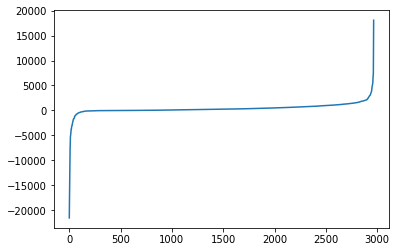

In [29]:
sorted_sellers.profits.plot()

<AxesSubplot:>

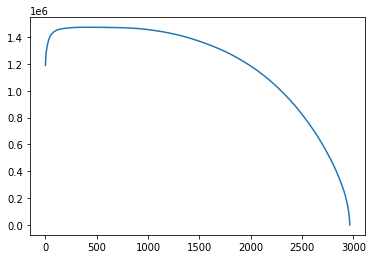

In [33]:
total_profits = sorted_sellers.profits.sum()
(total_profits - sorted_sellers.cumsum().profits).plot()

In [ ]:
# IT Costs
# it_costs = A * n_total_orders ** 1/2
# BRL 500,000 for the entire orders in the dataset